Have a complete notebook for wrangling and cleaning the zillow data
- origional data
- compiled by dataset and by year
- compiled into one dataframe dictionary
- made into yearly data
- made into monhtly data  
-- NANS?

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as pl
import datetime
import pickle

colors = ['y', 'm', 'c', 'r', 'g', 'b', 'k', 'DeepPink',\
          'DodgerBlue', 'Aquamarine', 'MediumSpringGreen',\
         'MidnightBlue', 'Gold', 'DarkSlateGray', 'LimeGreen', \
         'LightSeaGreen', 'Salmon', 'Indigo', 'DarkMagenta', \
         'Thistle', 'DeepSkyBlue', 'CadetBlue', \
         'BlueViolet', 'Chocolate', 'SaddleBrown', 'Maroon', \
         'Peru', 'DarkOrange', 'Teal', 'DarkKhaki']

In [2]:
def merge_check(df1, df2, on1, on2):
    '''Input two dataframes to be merged. Returns the percent of 
    each dataframe that would be preserved on an inner merge. Also
    returns merged dataframe.'''
    df1_size = len(df1)
    df2_size = len(df2)
    merged_df = pd.merge(df1, df2, left_on=on1, right_on=on2, how='inner')
    inmerge_size = len(merged_df)
    print ('df1 = {}%'.format((inmerge_size/df1_size)*100))
    print ('df2 = {}%'.format((inmerge_size/df2_size)*100))
    return merged_df

Load all dataframe dictionaries with county data, and combine multi years into single dataframes, indexed on FIPS  
- ZHVI  --> **df_zhvi** 
    - Time series, FIPS, RegionName, State, feature
    - features: 
        - ZHVI_1bedroom
        - ZHVI_2bedroom
        - ZHVI_3bedroom
        - ZHVI_4bedroom
        - ZHVI_5BedroomOrMore
        - ZHVI_AllHomes
        - ZHVI_BottomTier
        - ZHVI_BottomTier_yoy
        - ZHVI_Condominum
        - ZHVI_MiddleTier
        - ZHVI_MiddleTier_yoy
        - ZHVI_SingleFamilyResidence
        - ZHVI_TopTier
        - ZHVI_TopTier_yoy
- median listing --> **df_med_list** 
    - Time series, FIPS, RegionName, State, feature
    - features: 
        - Med_Listing_Price_1bedroom
        - Med_Listing_Price_2bedroom
        - Med_Listing_Price_3bedroom
        - Med_Listing_Price_4bedroom
        - Med_Listing_Price_5BedroomOrMore
        - Med_Listing_Price_AllHomes
        - Med_Listing_Price_CondoCoop
        - Med_Listing_Price_DuplexTriplex
        - Med_Listing_Price_Sfr
- market info --> **df_cnt_mrkts** 
    - Time series, FIPS, RegionName, State, feature
    - features: 
        - County_MedianValuePerSqft_AllHomes
        - County_PriceToRentRatio_AllHomes
        - County_PctOfHomesDecreasingInValues_AllHomes
        - County_PctOfHomesIncreasingInValues_AllHomes
- Rental Price per Square Foot --> **df_rentp_psqft**
    - Time series, FIPS, RegionName, State, feature
    - features: 
        - rent_price_persqft_1bedroom
        - rent_price_persqft_2bedroom
        - rent_price_persqft_3bedroom
        - rent_price_persqft_4bedroom
        - rent_price_persqft_5BedroomOrMore
        - rent_price_persqft_AllHomes
        - rent_price_persqft_CondoCoop
        - rent_price_persqft_DuplexTriplex
        - rent_price_persqft_Sfr
        - rent_price_persqft_Studio
        - rent_price_persqft_Mfr5Plus 
- Median rental Price --> **df_med_rental**
    - Time series, FIPS, RegionName, State, feature
    - features: 
        - rent_med_rental_1bedroom
        - rent_med_rental_2bedroom
        - rent_med_rental_3bedroom
        - rent_med_rental_4bedroom
        - rent_med_rental_5BedroomOrMore
        - rent_med_rental_AllHomes
        - rent_med_rental_CondoCoop
        - rent_med_rental_DuplexTriplex
        - rent_med_rental_Sfr
        - rent_med_rental_Studio
        - rent_med_rental_Mfr5Plus 
Zillow Data:
- z_yrly
    - all the monthly values for each features averaged over the entire year
- z_mnthly
    - all the monthly values for each feature
       

#### ZILLOW DATA

** * County Crosswalk * **

In [3]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [4]:
countyCW = pd.read_csv('./data/Zillow_Data/CountyCrossWalk_Zillow.csv')
countyCW.head(3)

,CountyName,StateName,StateFIPS,CountyFIPS,MetroName_Zillow,CBSAName,CountyRegionID_Zillow,MetroRegionID_Zillow,FIPS,CBSACode
0,Pike,Pennsylvania,42,103,"New York, NY","New York-Newark-Jersey City, NY-NJ-PA",280,394913.0,42103,35620.0
1,Bronx,New York,36,5,"New York, NY","New York-Newark-Jersey City, NY-NJ-PA",401,394913.0,36005,35620.0
2,Essex,New Jersey,34,13,"New York, NY","New York-Newark-Jersey City, NY-NJ-PA",504,394913.0,34013,35620.0


In [5]:
countyCW['FIPS'] = countyCW['FIPS'].apply(str)
countyCW['FIPS'] = countyCW['FIPS'].str.zfill(5)

In [6]:
len(countyCW)

3144

In [7]:
df_m = merge_check(countyCW, pd.Series(states).reset_index(), ['StateName'], 0)
countyCW = df_m
countyCW.rename(columns={'index':'State', 0:'StateFullName'}, inplace=True)

df1 = 100.0%
df2 = 5515.78947368421%


In [8]:
countyCW = df_m
countyCW.rename(columns={'index':'State', 0:'StateFullName'}, inplace=True)

In [9]:
countyCW.drop(['StateFIPS', 'CountyFIPS',
       'MetroName_Zillow', 'CBSAName', 'CountyRegionID_Zillow',
       'MetroRegionID_Zillow', 'CBSACode', 'StateFullName'], axis=1, inplace=True)

In [10]:
countyCW.head()

,CountyName,StateName,FIPS,State
0,Pike,Pennsylvania,42103,PA
1,Montgomery,Pennsylvania,42091,PA
2,Philadelphia,Pennsylvania,42101,PA
3,Chester,Pennsylvania,42029,PA
4,Delaware,Pennsylvania,42045,PA


** * ZHVI * **

In [11]:
homes = ['1bedroom', '2bedroom', '3bedroom', '4bedroom', 
         '5BedroomOrMore', 'AllHomes', 'BottomTier', 'BottomTier_yoy',
        'Condominum', 'MiddleTier', 'MiddleTier_yoy', 'SingleFamilyResidence',
        'TopTier', 'TopTier_yoy']


In [12]:
#save data into a dictionary of dataframes for each housing type
zhvi = {}
for name in homes:
    path = './data/Zillow_Data/County/County_Zhvi_{}.csv'.format(name)
    zhvi[name] = pd.DataFrame(pd.read_csv(path))

In [13]:
for i in homes:
    print (i)
    zhvi[i].MunicipalCodeFIPS = zhvi[i].MunicipalCodeFIPS.apply(str)
    zhvi[i].MunicipalCodeFIPS = zhvi[i].MunicipalCodeFIPS.str.zfill(3)
    zhvi[i].StateCodeFIPS = zhvi[i].StateCodeFIPS.apply(str)
    zhvi[i].StateCodeFIPS = zhvi[i].StateCodeFIPS.str.zfill(2)
    zhvi[i]['FIPS'] = zhvi[i].StateCodeFIPS + zhvi[i].MunicipalCodeFIPS
    zhvi[i].drop(['RegionID', 'Metro', 'StateCodeFIPS', 'MunicipalCodeFIPS', 'SizeRank'], axis=1, inplace=True)
    zhvi[i]['feature'] = 'ZHVI_{}'.format(i)

1bedroom
2bedroom
3bedroom
4bedroom
5BedroomOrMore
AllHomes
BottomTier
BottomTier_yoy
Condominum
MiddleTier
MiddleTier_yoy
SingleFamilyResidence
TopTier
TopTier_yoy


In [14]:
zhvi['AllHomes'].head(2)

,RegionName,State,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,FIPS,feature
0,Los Angeles,CA,159400.0,159500.0,159200.0,158900.0,158700.0,158600.0,158700.0,159000.0,...,554400,558100,561200,563700,565900,568200,571400,574400,06037,ZHVI_AllHomes
1,Cook,IL,128700.0,129000.0,128900.0,128600.0,128400.0,128400.0,128500.0,128800.0,...,211200,211900,212200,212600,213100,214000,215100,215900,17031,ZHVI_AllHomes


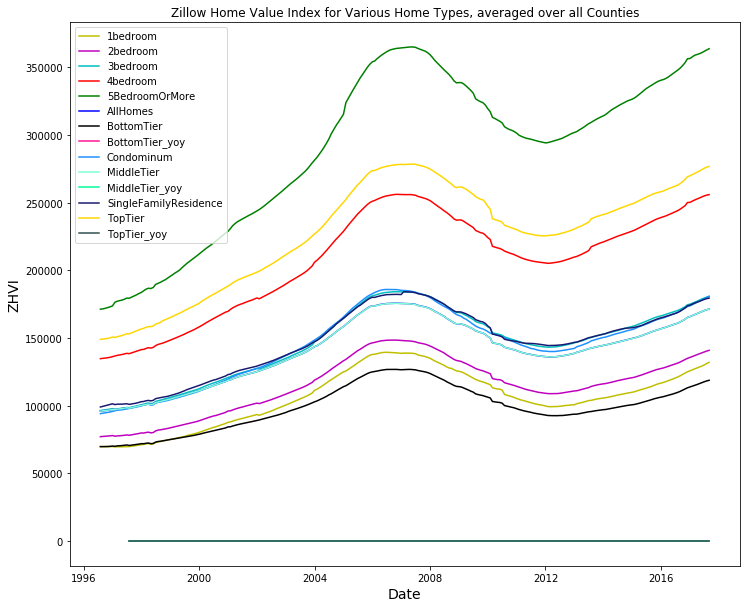

In [15]:
p = {}
for name in homes:
    p[name] = pd.DataFrame(zhvi[name].mean()[4:])
    p[name].reset_index(inplace=True)
    p[name].rename(columns=({'index':'Date', 0:'ZHVI'}), inplace=True)
    p[name].Date = p[name].Date.apply(datetime.datetime.strptime, args=('%Y-%m',))

    
#d['1bedroom'].mean()[4:].index.apply(datetime.datetime.strptime, args=('%Y-%m',))
# above doesn't work
pl.figure(figsize=(12, 10))
i=0
for name in homes:
    pl.plot(p[name].Date, p[name].ZHVI, color=(colors[i]), label = name)
    i += 1
pl.legend(loc='best')
pl.xlabel('Date', fontsize=14)
pl.ylabel('ZHVI', fontsize=14)
pl.title('Zillow Home Value Index for Various Home Types, averaged over all Counties')

In [16]:
output = open('./data/County_ZHVI_allhomes.pkl', 'wb')
pickle.dump(zhvi, output)
output.close()

In [17]:
df_zhvi = pd.concat(zhvi).reset_index().drop(['level_0', 'level_1'], axis=1)

In [18]:
#df_zhvi.to_csv('./data/dataframes/df_zhvi.csv')

Load all county dateframes into notebook, and merge on FIPS

** * Median Listing Price * **

In [19]:
housing = ['1bedroom', '2bedroom', '3bedroom', '4bedroom', 
         '5BedroomOrMore', 'AllHomes', 'CondoCoop', 'DuplexTriplex', 'Sfr']
med_listing = {}
for name in housing:
    path = './data/Zillow_Data/County/County_MedianListingPrice_{}.csv'.format(name)
    med_listing[name] = pd.DataFrame(pd.read_csv(path))

In [20]:
for i in housing:
    print (i)
    med_listing[i].MunicipalCodeFIPS = med_listing[i].MunicipalCodeFIPS.apply(str)
    med_listing[i].MunicipalCodeFIPS = med_listing[i].MunicipalCodeFIPS.str.zfill(3)
    med_listing[i].StateCodeFIPS = med_listing[i].StateCodeFIPS.apply(str)
    med_listing[i].StateCodeFIPS = med_listing[i].StateCodeFIPS.str.zfill(2)
    med_listing[i]['FIPS'] = med_listing[i].StateCodeFIPS + med_listing[i].MunicipalCodeFIPS
    med_listing[i].drop([ 'Metro', 'StateCodeFIPS', 'MunicipalCodeFIPS', 'SizeRank'], axis=1, inplace=True)
    med_listing[i]['feature'] = 'Med_Listing_Price_{}'.format(i)

1bedroom
2bedroom
3bedroom
4bedroom
5BedroomOrMore
AllHomes
CondoCoop
DuplexTriplex
Sfr


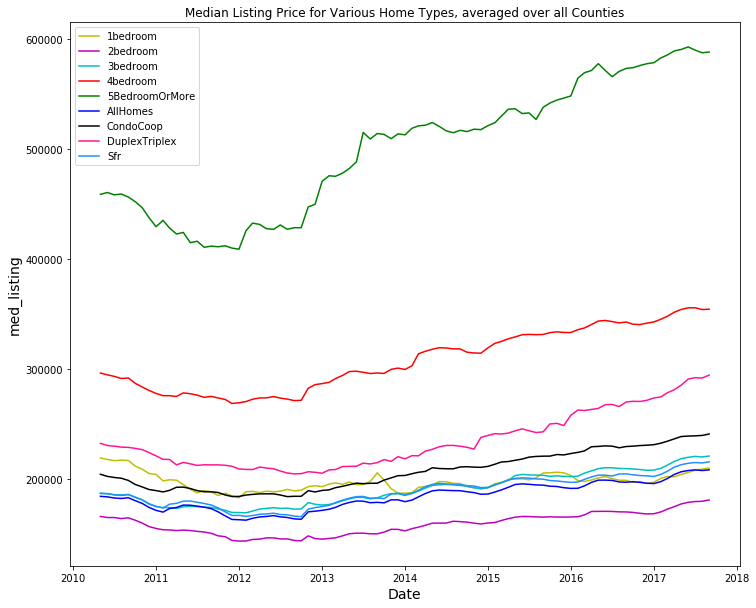

In [21]:
p = {}
for name in housing:
    p[name] = pd.DataFrame(med_listing[name].mean()[4:])
    p[name].reset_index(inplace=True)
    p[name].rename(columns=({'index':'Date', 0:'med_listing'}), inplace=True)
    p[name].Date = p[name].Date.apply(datetime.datetime.strptime, args=('%Y-%m',))

    
#d['1bedroom'].mean()[4:].index.apply(datetime.datetime.strptime, args=('%Y-%m',))
# above doesn't work
pl.figure(figsize=(12, 10))
i=0
for name in housing:
    pl.plot(p[name].Date, p[name].med_listing, color=(colors[i]), label = name)
    i += 1
pl.legend(loc='best')
pl.xlabel('Date', fontsize=14)
pl.ylabel('med_listing', fontsize=14)
pl.title('Median Listing Price for Various Home Types, averaged over all Counties')

In [22]:
output = open('./data/Zillow_Data/County_MedianListing.pkl', 'wb')
pickle.dump(med_listing, output)
output.close()

In [23]:
df_med_list = pd.concat(med_listing).reset_index().drop(['level_0', 'level_1'], axis=1)

In [24]:
df_med_list.head(3)

,RegionName,State,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,...,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,FIPS,feature
0,Los Angeles,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,425000.0,425250.0,435000.0,445000.0,439000.0,435000.0,439250.0,449000.0,06037,Med_Listing_Price_1bedroom
1,Cook,IL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,163000.0,171400.0,171400.0,160000.0,155450.0,172400.0,165900.0,164900.0,17031,Med_Listing_Price_1bedroom
2,Harris,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,167500.0,168995.0,167500.0,159950.0,160000.0,155260.0,149945.0,149900.0,48201,Med_Listing_Price_1bedroom


In [25]:
#df_med_list.to_csv('./data/dataframes/df_med_list.csv')

** * County Market Data * **  


In [26]:
markets = ["County_MedianValuePerSqft_AllHomes", "InventoryMeasure_SSA_County_Public",
"InventoryMeasure_County_Public", "DaysOnZillow_Public_County", "County_PriceToRentRatio_AllHomes",
"County_PctOfHomesDecreasingInValues_AllHomes", "County_PctOfHomesIncreasingInValues_AllHomes"]
# "MarketHealthIndex_County"

In [27]:
#save data into a dictionary of dataframes for each housing type
cnty_mrkt = {}
for name in markets:
    print (name)
    path = './data/Zillow_Data/County/{}.csv'.format(name)
    cnty_mrkt[name] = pd.DataFrame(pd.read_csv(path))

County_MedianValuePerSqft_AllHomes
InventoryMeasure_SSA_County_Public
InventoryMeasure_County_Public
DaysOnZillow_Public_County
County_PriceToRentRatio_AllHomes
County_PctOfHomesDecreasingInValues_AllHomes
County_PctOfHomesIncreasingInValues_AllHomes


In [28]:
df_m = merge_check(cnty_mrkt[markets[1]], countyCW,['CountyName', 'StateFullName'], 
            ['CountyName', 'StateName'])
cnty_mrkt[markets[1]] = df_m
cnty_mrkt[markets[1]].head(2)

df1 = 99.94591671173607%
df2 = 58.778625954198475%


,RegionName,RegionType,CountyName,Metro,StateFullName,DataTypeDescription,2010-01,2010-02,2010-03,2010-04,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,StateName,FIPS,State
0,Los Angeles,County,Los Angeles,Los Angeles-Long Beach-Anaheim,California,All Homes,30760,29938,29104,28639,...,11698,11404,11292,11038,10556,10282,10201,California,06037,CA
1,Cook,County,Cook,Chicago,Illinois,All Homes,32421,32700,33421,33560,...,17680,17142,16906,16931,16995,17355,17877,Illinois,17031,IL


In [29]:
df_m = merge_check(cnty_mrkt[markets[3]], countyCW,['RegionName', 'StateName'], 
            ['CountyName', 'State'])
cnty_mrkt[markets[3]] = df_m
cnty_mrkt[markets[3]].head(2)

df1 = 99.7560975609756%
df2 = 13.008905852417302%


,RegionName,StateName_x,RegionType,CBSA Title,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,CountyName,StateName_y,FIPS,State
0,Ada,ID,County,"""Boise City, ID""",169,145.0,151.500,161.75,155.0,134.75,...,65.25,52.75,50.75,52.00,52.250,52.0,Ada,Idaho,16001,ID
1,Bay,FL,County,"""Panama City, FL""",338,152.5,186.875,191.25,201.5,210.00,...,123.75,118.75,107.50,98.25,95.125,101.5,Bay,Florida,12005,FL


this probably won't be a good feature to use because it only has data for 13% of the counties in the US

In [30]:
cnty_mrkt[markets[3]].drop(['RegionName', 'RegionType', 'StateName_x', 'CBSA Title', 
                         'StateName_y', 'SizeRank'], axis=1, inplace=True)
cnty_mrkt[markets[3]]['feature'] = markets[3]
cnty_mrkt[markets[3]].head(2)

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,CountyName,FIPS,State,feature
0,145.0,151.500,161.75,155.0,134.75,123.5,126.125,130.875,125.375,120.375,...,65.25,52.75,50.75,52.00,52.250,52.0,Ada,16001,ID,DaysOnZillow_Public_County
1,152.5,186.875,191.25,201.5,210.00,200.5,192.500,163.875,142.125,147.500,...,123.75,118.75,107.50,98.25,95.125,101.5,Bay,12005,FL,DaysOnZillow_Public_County


In [31]:
cnty_mrkt[markets[3]].FIPS.isnull().sum()

0

In [32]:
cnty_mrkt[markets[1]].drop(['RegionName', 'RegionType', 'StateName', 
                        'Metro', 'StateFullName', 'DataTypeDescription'], axis=1, inplace=True)
cnty_mrkt[markets[1]]['feature'] = markets[1]
cnty_mrkt[markets[1]].head(2)

,CountyName,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,FIPS,State,feature
0,Los Angeles,30760,29938,29104,28639,28302,28102,27942,28091,28850,...,11698,11404,11292,11038,10556,10282,10201,06037,CA,InventoryMeasure_SSA_County_Public
1,Cook,32421,32700,33421,33560,33055,33154,33341,32836,32388,...,17680,17142,16906,16931,16995,17355,17877,17031,IL,InventoryMeasure_SSA_County_Public


In [33]:
df_m = merge_check(cnty_mrkt[markets[2]], countyCW,['CountyName', 'StateFullName'], 
            ['CountyName', 'StateName'])
cnty_mrkt[markets[2]] = df_m
cnty_mrkt[markets[2]].head(2)

df1 = 99.94591671173607%
df2 = 58.778625954198475%


,RegionName,RegionType,CountyName,Metro,StateFullName,DataTypeDescription,2010-01,2010-02,2010-03,2010-04,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,StateName,FIPS,State
0,Los Angeles,County,Los Angeles,Los Angeles-Long Beach-Anaheim,California,All Homes,30098,28988,28609,28311,...,10713,10572,10948,11568,11578,11653,11575,California,06037,CA
1,Cook,County,Cook,Chicago,Illinois,All Homes,29698,30106,32870,34568,...,16595,16779,17514,18284,18482,19192,19704,Illinois,17031,IL


In [34]:
cnty_mrkt[markets[2]].drop(['RegionName', 'RegionType', 'StateName', 
                        'Metro', 'StateFullName', 'DataTypeDescription'], axis=1, inplace=True)
cnty_mrkt[markets[2]]['feature'] = markets[2]
cnty_mrkt[markets[2]].head(2)

,CountyName,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,FIPS,State,feature
0,Los Angeles,30098,28988,28609,28311,27698,28432,28511,28806,29573,...,10713,10572,10948,11568,11578,11653,11575,06037,CA,InventoryMeasure_County_Public
1,Cook,29698,30106,32870,34568,33383,34646,35396,34643,33013,...,16595,16779,17514,18284,18482,19192,19704,17031,IL,InventoryMeasure_County_Public


In [35]:
# work around
kees_trunc = ['County_MedianValuePerSqft_AllHomes',
 'County_PriceToRentRatio_AllHomes',
 'County_PctOfHomesDecreasingInValues_AllHomes',
 'County_PctOfHomesIncreasingInValues_AllHomes']
for i in kees_trunc:
    print (i)
    cnty_mrkt[i].MunicipalCodeFIPS = cnty_mrkt[i].MunicipalCodeFIPS.apply(str)
    cnty_mrkt[i].MunicipalCodeFIPS = cnty_mrkt[i].MunicipalCodeFIPS.str.zfill(3)
    cnty_mrkt[i].StateCodeFIPS = cnty_mrkt[i].StateCodeFIPS.apply(str)
    cnty_mrkt[i].StateCodeFIPS = cnty_mrkt[i].StateCodeFIPS.str.zfill(2)
    cnty_mrkt[i]['FIPS'] = cnty_mrkt[i].StateCodeFIPS + cnty_mrkt[i].MunicipalCodeFIPS
    cnty_mrkt[i].drop(['RegionID', 'Metro', 'StateCodeFIPS', 'MunicipalCodeFIPS', 'SizeRank'], axis=1, inplace=True)
    cnty_mrkt[i]['feature'] = i

County_MedianValuePerSqft_AllHomes
County_PriceToRentRatio_AllHomes
County_PctOfHomesDecreasingInValues_AllHomes
County_PctOfHomesIncreasingInValues_AllHomes


In [36]:
output = open('./data/Zillow_Data/County_Market_Data.pkl', 'wb')
pickle.dump(cnty_mrkt, output)
output.close()

In [37]:
df_cnt_mrkts = pd.concat([cnty_mrkt[markets[0]], cnty_mrkt[markets[1]],
                          cnty_mrkt[markets[2]], cnty_mrkt[markets[3]],
                         cnty_mrkt[markets[4]], cnty_mrkt[markets[5]]])


In [38]:
df_cnt_mrkts.head(3)

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2017-05,2017-06,2017-07,2017-08,2017-09,CountyName,FIPS,RegionName,State,feature
0,113.0,113.0,113.0,112.0,112.0,112.0,112.0,112.0,113.0,113.0,...,394.0,395.0,396.0,398.0,400.0,NaN,06037,Los Angeles,CA,County_MedianValuePerSqft_AllHomes
1,103.0,103.0,103.0,102.0,102.0,102.0,102.0,102.0,102.0,103.0,...,165.0,165.0,164.0,164.0,165.0,NaN,17031,Cook,IL,County_MedianValuePerSqft_AllHomes
2,62.0,62.0,62.0,63.0,63.0,63.0,63.0,64.0,64.0,64.0,...,141.0,142.0,143.0,144.0,144.0,NaN,04013,Maricopa,AZ,County_MedianValuePerSqft_AllHomes


In [39]:
#df_cnt_mrkts.to_csv('./data/dataframes/df_cnt_mrkts.csv')

** * Rental: Price per SqFt and median price * **

In [40]:
housing = ['1bedroom', '2bedroom', '3bedroom', '4bedroom', 
         '5BedroomOrMore', 'AllHomes', 'CondoCoop', 'DuplexTriplex', 'Sfr',
        'Studio', 'Mfr5Plus']
rentp_psqft = {}
for name in housing:
    path = './data/Zillow_Data/County/County_MedianRentalPricePerSqft_{}.csv'.format(name)
    rentp_psqft[name] = pd.DataFrame(pd.read_csv(path))

In [41]:
for i in list(rentp_psqft.keys()):
    print (i)
    rentp_psqft[i].MunicipalCodeFIPS = rentp_psqft[i].MunicipalCodeFIPS.apply(str)
    rentp_psqft[i].MunicipalCodeFIPS = rentp_psqft[i].MunicipalCodeFIPS.str.zfill(3)
    rentp_psqft[i].StateCodeFIPS = rentp_psqft[i].StateCodeFIPS.apply(str)
    rentp_psqft[i].StateCodeFIPS = rentp_psqft[i].StateCodeFIPS.str.zfill(2)
    rentp_psqft[i]['FIPS'] = rentp_psqft[i].StateCodeFIPS + rentp_psqft[i].MunicipalCodeFIPS
    rentp_psqft[i].drop(['Metro', 'StateCodeFIPS', 'MunicipalCodeFIPS', 'SizeRank'], axis=1, inplace=True)
    rentp_psqft[i]['feature'] = 'rent_price_persqft_{}'.format(i)

1bedroom
2bedroom
3bedroom
4bedroom
5BedroomOrMore
AllHomes
CondoCoop
DuplexTriplex
Sfr
Studio
Mfr5Plus


In [42]:
output = open('./data/County_RentalPPSQft.pkl', 'wb')
pickle.dump(rentp_psqft, output)
output.close()

In [43]:
df_rentp_psqft = pd.concat(rentp_psqft).reset_index().drop(['level_0', 'level_1'], axis=1)
df_rentp_psqft.head(3)

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,FIPS,RegionName,State,feature
0,NaN,1.876072,1.900000,1.993623,1.993333,1.978114,1.932825,1.954321,1.900000,1.816487,...,2.915550,2.915385,2.923381,2.933333,2.918342,2.919563,06037,Los Angeles,CA,rent_price_persqft_1bedroom
1,NaN,1.766968,1.698396,1.678571,1.644231,1.616696,1.679544,1.481033,1.656367,1.735088,...,2.144242,2.187500,2.222964,2.207478,2.233506,2.316891,17031,Cook,IL,rent_price_persqft_1bedroom
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.542272,1.564718,1.532950,1.526165,1.545861,1.552696,48201,Harris,TX,rent_price_persqft_1bedroom


In [44]:
#df_rentp_psqft.to_csv('./data/dataframes/df_rentp_psqft.csv')

In [76]:
med_rental = {}
for name in housing:
    path = './data/Zillow_Data/County/County_MedianRentalPrice_{}.csv'.format(name)
    med_rental[name] = pd.DataFrame(pd.read_csv(path))

In [77]:
for i in list(med_rental.keys()):
    print (i)
    med_rental[i].MunicipalCodeFIPS = med_rental[i].MunicipalCodeFIPS.apply(str)
    med_rental[i].MunicipalCodeFIPS = med_rental[i].MunicipalCodeFIPS.str.zfill(3)
    med_rental[i].StateCodeFIPS = med_rental[i].StateCodeFIPS.apply(str)
    med_rental[i].StateCodeFIPS = med_rental[i].StateCodeFIPS.str.zfill(2)
    med_rental[i]['FIPS'] = med_rental[i].StateCodeFIPS + med_rental[i].MunicipalCodeFIPS
    med_rental[i].drop(['Metro', 'StateCodeFIPS', 'MunicipalCodeFIPS', 'SizeRank'], axis=1, inplace=True)
    med_rental[i]['feature'] = 'med_rental_{}'.format(i)

1bedroom
2bedroom
3bedroom
4bedroom
5BedroomOrMore
AllHomes
CondoCoop
DuplexTriplex
Sfr
Studio
Mfr5Plus


In [78]:
output = open('./data/County_RentalPrice.pkl', 'wb')
pickle.dump(med_rental, output)
output.close()

In [79]:
df_med_rental = pd.concat(med_rental).reset_index().drop(['level_0', 'level_1'], axis=1)
df_med_rental.head(3)

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,FIPS,RegionName,State,feature
0,NaN,NaN,1375.0,1450.0,1500.0,1495.0,1495.0,1500.0,1337.5,1295.0,...,1990.0,1965.0,1995.0,1995.0,1990.5,1975.0,06037,Los Angeles,CA,med_rental_1bedroom
1,NaN,NaN,1100.0,1130.5,1099.5,1097.0,1020.5,985.0,1140.0,1300.0,...,1450.0,1474.5,1475.0,1465.0,1475.0,1550.0,17031,Cook,IL,med_rental_1bedroom
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1199.0,1201.0,1183.0,1180.0,1195.0,1204.5,48201,Harris,TX,med_rental_1bedroom


#### Combine datasets

In [80]:
# all data sets to combine
df_list = [df_zhvi, df_med_list, df_cnt_mrkts, df_rentp_psqft, df_med_rental]

In [81]:
# make columns headers all in string format BEFORE they all get concatonated
for df in df_list:
    df.columns = df.columns.astype(str)
    print ('Total Nan FIPS', df.FIPS.isnull().sum())

Total Nan FIPS 0
Total Nan FIPS 0
Total Nan FIPS 0
Total Nan FIPS 0
Total Nan FIPS 0


Make a new dataframe with zillow monthly values recombined to be a yearly value (the average over the year)

In [82]:
zillows = pd.concat(df_list)

In [83]:
zillows.head(2)

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2017-05,2017-06,2017-07,2017-08,2017-09,CountyName,FIPS,RegionName,State,feature
0,95700.0,94500.0,93700.0,93100.0,93000.0,93100.0,92800.0,92500.0,92400.0,92500.0,...,405000.0,407400.0,410200.0,414200.0,418400.0,NaN,06037,Los Angeles,CA,ZHVI_1bedroom
1,90200.0,90000.0,89400.0,89000.0,89100.0,89200.0,89000.0,89200.0,89600.0,90000.0,...,171600.0,172000.0,171800.0,171600.0,171900.0,NaN,17031,Cook,IL,ZHVI_1bedroom


In [84]:
zillows.CountyName.isnull().sum()

39707

In [85]:
zillows.CountyName.fillna(zillows.RegionName, inplace = True)

In [86]:
zillows.RegionName.fillna(zillows.CountyName, inplace = True)

In [87]:
zillows['1996'] = zillows.iloc[:,0:9].mean(axis=1)

In [88]:
zillows['1997'] = zillows.iloc[:,9:21].mean(axis=1)
zillows['1998'] = zillows.iloc[:,21:33].mean(axis=1)
zillows['1999'] = zillows.iloc[:,33:45].mean(axis=1)
zillows['2000'] = zillows.iloc[:,45:57].mean(axis=1)
zillows['2001'] = zillows.iloc[:,57:69].mean(axis=1)
zillows['2002'] = zillows.iloc[:,69:81].mean(axis=1)
zillows['2003'] = zillows.iloc[:,81:93].mean(axis=1)
zillows['2004'] = zillows.iloc[:,93:105].mean(axis=1)
zillows['2005'] = zillows.iloc[:,105:117].mean(axis=1)
zillows['2006'] = zillows.iloc[:,117:129].mean(axis=1)
zillows['2007'] = zillows.iloc[:,129:141].mean(axis=1)
zillows['2008'] = zillows.iloc[:,141:153].mean(axis=1)
zillows['2009'] = zillows.iloc[:,153:165].mean(axis=1)
zillows['2010'] = zillows.iloc[:,165:177].mean(axis=1)
zillows['2011'] = zillows.iloc[:,177:189].mean(axis=1)
zillows['2012'] = zillows.iloc[:,189:201].mean(axis=1)
zillows['2013'] = zillows.iloc[:,201:213].mean(axis=1)
zillows['2014'] = zillows.iloc[:,213:225].mean(axis=1)
zillows['2015'] = zillows.iloc[:,225:237].mean(axis=1)
zillows['2016'] = zillows.iloc[:,237:249].mean(axis=1)
zillows['2017'] = zillows.iloc[:,249:258].mean(axis=1)

In [89]:
z_yrly = zillows.iloc[:, 258:]

In [90]:
z_mnthly = zillows.iloc[:, :262]

In [93]:
z_yrly.drop(['CountyName'],axis=1, inplace=True)
z_mnthly.drop(['CountyName'],axis=1, inplace=True)

In [94]:
z_mnthly.to_csv('./data/dataframes/z_mnthly.csv')
z_yrly.to_csv('./data/dataframes/z_yrly.csv')